# Import des librairies

In [1]:
# algèbre linéaire
import numpy as np 

# traitement des données
import pandas as pd

# graphiques et visualisation des données
import seaborn as sns
sns.set_theme(style="whitegrid") # style graphique des visualisations
%matplotlib inline
import matplotlib.pyplot as plt

# identification des types de données
from pandas.api.types import is_string_dtype, is_numeric_dtype

# Chargement des données

In [2]:
path = 'data/openfoodfacts_data_for_analysis.csv'

In [3]:
open_food_facts_df = pd.read_csv(path, sep="\t")

# Exploration préliminaire des données

In [4]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 10 columns):
Unnamed: 0          104300 non-null int64
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 8.0+ MB


L'index apparaît comme une variable dans le jeu de données exporté. Il sera supprimé car un nouvel index est créé lors du chargement.

In [5]:
open_food_facts_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
open_food_facts_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 9 columns):
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null float64
dtypes: float64(3), object(6)
memory usage: 45.1 MB


In [9]:
open_food_facts_df.describe(include='all')

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
count,103844,71866,73811,104300,104159,104300,104300.000000,104300.000000,104067.000000
unique,17089,21046,19093,5,13,45,NaN,NaN,NaN
top,u,Green Dot,"en:e322,en:e322i",d,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN
freq,3576,4116,3834,30566,22711,11070,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.140489,9.488926,3.512872
std,NaN,NaN,NaN,NaN,NaN,NaN,2.476332,8.933405,0.875439
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-14.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,10.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,16.000000,4.000000


Le jeu de données contient des données manquantes parmi les variables *brands_tags*, *labels_en*, *additives_tags*, *pnns_groups_1* et *nova_group*.

Nous allons les visualiser ci-dessus :

In [11]:
nombres_donnees_manquantes = open_food_facts_df.isnull().sum()
nombres_donnees_totales = open_food_facts_df.isnull().count()
pourcentages_donnees_manquantes = round(nombres_donnees_manquantes/nombres_donnees_totales*100, 1)

donnees_manquantes_df = pd.DataFrame({'nombre': nombres_donnees_manquantes, 
                                      'total': nombres_donnees_totales, 
                                      'pourcentage': pourcentages_donnees_manquantes})

donnees_manquantes_df.sort_values(by=['nombre'], ascending=False, inplace=True)

donnees_manquantes_df

,nombre,total,pourcentage
labels_en,32434,104300,31.1
additives_tags,30489,104300,29.2
brands_tags,456,104300,0.4
nova_group,233,104300,0.2
pnns_groups_1,141,104300,0.1
nutriscore_grade,0,104300,0.0
pnns_groups_2,0,104300,0.0
additives_n,0,104300,0.0
nutriscore_score,0,104300,0.0


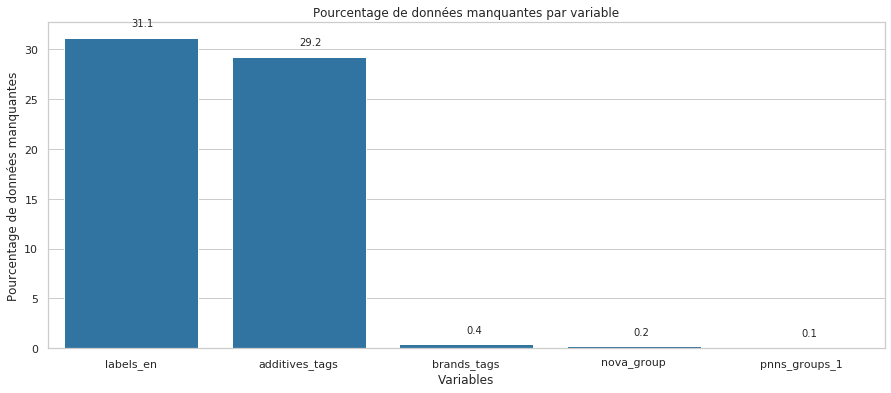

In [12]:
donnees_manquantes_df = donnees_manquantes_df[donnees_manquantes_df['nombre'] > 0]

plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x=donnees_manquantes_df.index.values, y='pourcentage', data=donnees_manquantes_df, color='tab:blue')
plt.title('Pourcentage de données manquantes par variable')
plt.ylabel('Pourcentage de données manquantes')
plt.xlabel('Variables')

for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
    plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les variables contenant une plus grande proportion de données manquantes sont *labels_en* et *additives_tags*, avec chacune 31.1% et 29.2% de données manquantes.

Il faudra porter une attention particulière lors de l'imputation de ces variables car la nouvelle valeur représentera environ 30% des données.

In [13]:
open_food_facts_df.head(12)

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
0,crousresto,NaN,"en:e14xx,en:e262,en:e262i,en:e326",a,Cereals and potatoes,Bread,3.0,-4.0,4.0
1,comme-j-aime,"fr:viande-francaise,Made in France","en:e14xx,en:e451,en:e451i",b,Composite foods,One-dish meals,2.0,0.0,4.0
2,comme-j-aime,Green Dot,"en:e102,en:e110,en:e407,en:e471",b,Milk and dairy products,Dairy desserts,4.0,2.0,4.0
3,mx3,Green Dot,"en:e322,en:e322i",b,Fruits and vegetables,Fruits,1.0,1.0,4.0
4,"wonka,nerds","No artificial flavors,Contains GMOs","en:e102,en:e110,en:e129,en:e132,en:e133,en:e29...",d,Sugary snacks,Sweets,7.0,14.0,4.0
5,alice-delice,NaN,"en:e171,en:e339ii,en:e420,en:e420i,en:e422,en:...",d,unknown,unknown,5.0,15.0,4.0
6,alice-delice,Gluten-free,"en:e330,en:e415,en:e420,en:e420ii,en:e422,en:e471",d,Sugary snacks,Sweets,5.0,18.0,4.0
7,vichy,"Low or no sugar,Contains a source of phenylala...","en:e420,en:e951",c,Sugary snacks,Sweets,2.0,3.0,4.0
8,"m-m-s,mars,mars-chocolat",Contains GMOs,en:e414,e,Sugary snacks,Sweets,1.0,36.0,4.0
9,pepsi,NaN,"en:e150d,en:e338",e,Beverages,Sweetened beverages,2.0,13.0,4.0


In [14]:
# identification des types de variables
variables_numeriques = []
variables_qualitatives = []

for variable in open_food_facts_df:
    if is_numeric_dtype(open_food_facts_df[variable]):
        variables_numeriques.append(variable)
    elif is_string_dtype(open_food_facts_df[variable]):
        variables_qualitatives.append(variable)
        
print(variables_numeriques)
print(variables_qualitatives)

['additives_n', 'nutriscore_score', 'nova_group']
['brands_tags', 'labels_en', 'additives_tags', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']


# Analyses univariées

Avant de réaliser les analyses, je vais d'abord modifier le type de donnée de *nova_group*.

In [15]:
open_food_facts_df = open_food_facts_df.astype({'nova_group': 'object'})

In [89]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 9 columns):
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null object
dtypes: float64(2), object(7)
memory usage: 7.2+ MB


## *Nova_group* : classification NOVA des produits

In [106]:
open_food_facts_df['nova_group'].value_counts()

4.0    71633
3.0    22792
1.0     8618
2.0     1024
Name: nova_group, dtype: int64

Text(0, 0.5, 'Nombre de produits')

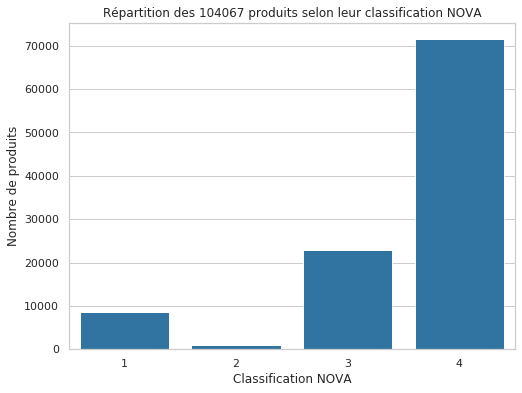

In [105]:
nombre_produits = open_food_facts_df['nova_group'].count()
plt.rcParams["figure.figsize"] = (8, 6)
sns.countplot(x='nova_group', data=open_food_facts_df, color='tab:blue', order=[1,2,3,4])
plt.title('Répartition des {} produits selon leur classification NOVA'.format(nombre_produits))
plt.xlabel('Classification NOVA')
plt.ylabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

La plupart des produits (environ 70%) sont ultra-transformés.

## *nutriscore_grade* : classement Nutri-Score des produits

In [107]:
open_food_facts_df['nutriscore_grade'].value_counts()

d    30566
c    23016
e    22130
a    14474
b    14114
Name: nutriscore_grade, dtype: int64

Text(0, 0.5, 'Nombre de produits')

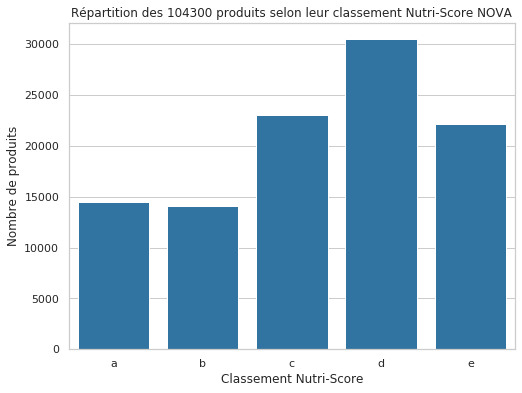

In [109]:
nombre_produits = open_food_facts_df['nutriscore_grade'].count()
plt.rcParams["figure.figsize"] = (8, 6)
sns.countplot(x='nutriscore_grade', data=open_food_facts_df, color='tab:blue', order=['a', 'b', 'c', 'd', 'e'])
plt.title('Répartition des {} produits selon leur classement Nutri-Score'.format(nombre_produits))
plt.xlabel('Classement Nutri-Score')
plt.ylabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

La plupart des produits ont un Nutri-Score moyen ou mauvais (environ 70%).

## *nutriscore_score* : score final Nutri-Score des produits

In [110]:
open_food_facts_df['nutriscore_score'].describe()

count    104300.000000
mean          9.488926
std           8.933405
min         -14.000000
25%           2.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64

Text(-3.8249999999999957, 0.5, 'Nombre de produits')

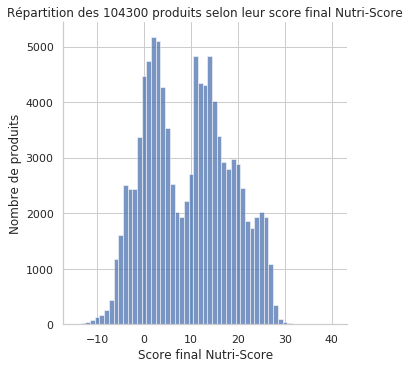

In [114]:
# Distribution du score final Nutri-Score
nombre_produits = open_food_facts_df['nutriscore_score'].count()
sns.displot(x='nutriscore_score', data=open_food_facts_df, discrete=True)
plt.title('Répartition des {} produits selon leur score final Nutri-Score'.format(nombre_produits))
plt.xlabel('Score final Nutri-Score')
plt.ylabel('Nombre de produits')

Text(0.5, 0, 'Score final Nutri-Score')

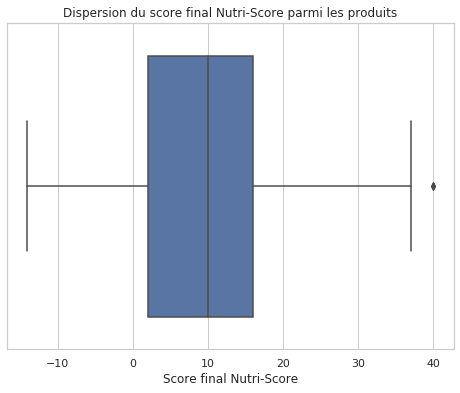

In [115]:
# Dispersion du score final Nutri-Score
sns.boxplot(x='nutriscore_score', data=open_food_facts_df)
plt.title('Dispersion du score final Nutri-Score parmi les produits')
plt.xlabel('Score final Nutri-Score')

Voyons quels produits sont les outliers sur leur score final du Nutri-Score.

In [116]:
open_food_facts_df[open_food_facts_df['nutriscore_score'] == 40]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
8012,cynxshno,NaN,en:e150d,e,Beverages,Unsweetened beverages,1.0,40.0,4
90646,body-attack,NaN,"en:e551,en:e950,en:e955",e,unknown,unknown,3.0,40.0,4


Le premier produit est une boisson de Pologne. Le deuxième un complément alimentaire de protéines.

## *additives_n* : nombre d'additifs des produits

In [117]:
open_food_facts_df['additives_n'].describe()

count    104300.000000
mean          2.140489
std           2.476332
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          30.000000
Name: additives_n, dtype: float64

Text(-10.824999999999996, 0.5, 'Nombre de produits')

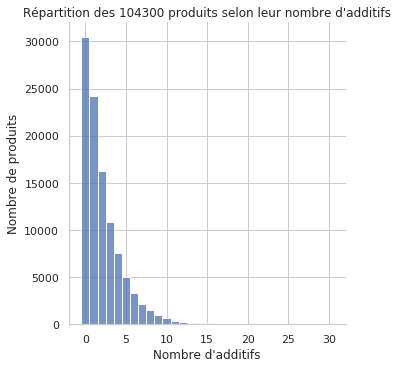

In [118]:
# Distribution du nombre d'additifs des produits
nombre_produits = open_food_facts_df['additives_n'].count()
sns.displot(x='additives_n', data=open_food_facts_df, discrete=True)
plt.title('Répartition des {} produits selon leur nombre d\'additifs'.format(nombre_produits))
plt.xlabel('Nombre d\'additifs')
plt.ylabel('Nombre de produits')

La plupart des produits n'ont aucun additif ou en ont très peu. Pour 75% d'entre eux, il y en a 3 au maximum.

Text(0.5, 0, "Nombre d'additifs")

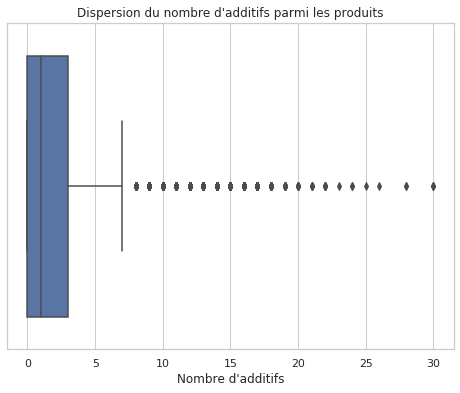

In [119]:
# Dispersion du nombre d'additifs des produits
sns.boxplot(x='additives_n', data=open_food_facts_df)
plt.title('Dispersion du nombre d\'additifs parmi les produits')
plt.xlabel('Nombre d\'additifs')

Voyons quels produits sont les outliers sur leur nombre d'additifs.

In [19]:
filtered_df = open_food_facts_df[open_food_facts_df['additives_n'] > 7]
filtered_df.sample(30)

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
4737,chef-select-to-go,NaN,"en:e14xx,en:e160c,en:e161b,en:e202,en:e224,en:...",d,Composite foods,Sandwiches,14.0,11.0,4
37914,leader-price,NaN,"en:e14xx,en:e160c,en:e161b,en:e202,en:e260,en:...",e,Fat and sauces,Dressings and sauces,8.0,19.0,4
78633,poppies-berlidon,Made in France,"en:e14xx,en:e160a,en:e160c,en:e171,en:e202,en:...",e,Sugary snacks,Biscuits and cakes,14.0,20.0,4
14029,haribo,NaN,"en:e100,en:e131,en:e141,en:e141ii,en:e153,en:e...",d,Sugary snacks,Sweets,15.0,14.0,4
93069,winny,"Green Dot,Made in France,fr:eco-emballages","en:e14xx,en:e160,en:e262,en:e300,en:e322,en:e3...",c,Composite foods,One-dish meals,9.0,5.0,4
9656,"la-laitiere,nestle,secret-de-mousse","Green Dot,New,fr:eco-emballages,fr:nutritional...","en:e100,en:e14xx,en:e160a,en:e160ai,en:e171,en...",c,Milk and dairy products,Dairy desserts,14.0,7.0,4
81954,les-delices-des-7-vallees,NaN,"en:e14xx,en:e160a,en:e160b,en:e202,en:e300,en:...",d,sugary-snacks,pastries,9.0,17.0,4
102760,look-o-look,"FSC,FSC Mix,fr:fsc-c021442","en:e100,en:e120,en:e133,en:e150d,en:e153,en:e1...",d,Sugary snacks,Sweets,17.0,14.0,4
52734,monoprix,Green Dot,"en:e14xx,en:e160a,en:e250,en:e316,en:e331,en:e...",d,Composite foods,One-dish meals,8.0,12.0,4
21445,casino,NaN,"en:e160,en:e160b,en:e322,en:e322i,en:e330,en:e...",c,Milk and dairy products,Ice cream,8.0,10.0,4


In [127]:
from scipy.stats import skew
skew(open_food_facts_df['additives_n'])

1.9621323603043257

La distribution du nombre d'additifs est totalement asymétrique, le coefficient de skewness valant 1.96 le confirme car il est positif. Il y aura besoin de transformer cette variable avec le log avant d'utiliser le dataset pour entraîner un modèle.

Voyons les stats des produits sans les outliers :

In [16]:
filtered_df = open_food_facts_df[open_food_facts_df['additives_n'] < 8]
filtered_df['additives_n'].describe()

count    99929.000000
mean         1.799508
std          1.833887
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: additives_n, dtype: float64

## *pnns_groups_1* : catégorie principale des produits

In [134]:
open_food_facts_df['pnns_groups_1'].value_counts()

Sugary snacks              22711
Composite foods            13098
Fish Meat Eggs             12689
Milk and dairy products    12460
Cereals and potatoes        8721
Beverages                   7807
Salty snacks                6897
unknown                     6141
Fruits and vegetables       6140
Fat and sauces              5396
sugary-snacks               1383
fruits-and-vegetables        712
cereals-and-potatoes           4
Name: pnns_groups_1, dtype: int64

Text(0.5, 0, 'Nombre de produits')

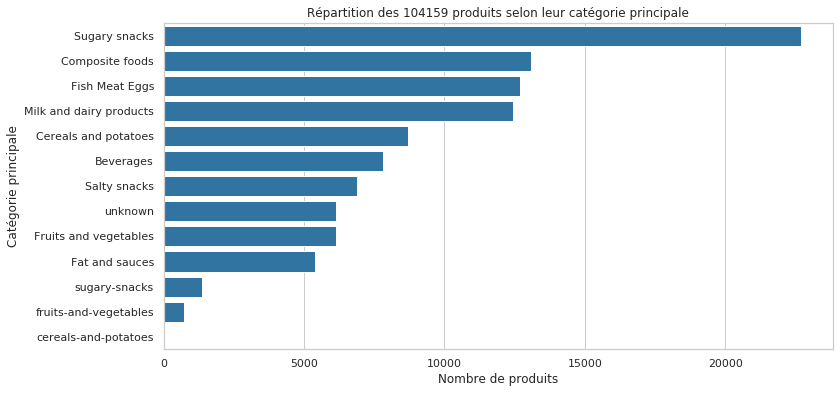

In [136]:
ordre_categorie = open_food_facts_df['pnns_groups_1'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_1'].count()
plt.rcParams["figure.figsize"] = (12, 6)
sns.countplot(y='pnns_groups_1', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie principale'.format(nombre_produits))
plt.ylabel('Catégorie principale')
plt.xlabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les deux principales catégories représentées parmi les produits sont les snacks sucrés et les plats préparés. On peut remarquer que trois catégories sont doublonnées : *sugary-snacks*, *fruits-and-vegetables* et *cereals-and-potatoes*. Ces catégories devront être regroupées avec leur doublon.

On note également que les produits de bonne qualité nutritionnelle tels que les fruits, légumes et céréales sont peu représentés dans notre jeu de données.

Regroupons les catégories concernées.

In [22]:
open_food_facts_df['pnns_groups_1'].replace(['sugary-snacks', 'fruits-and-vegetables', 'cereals-and-potatoes'],
                                           ['Sugary snacks', 'Fruits and vegetables', 'Cereals and potatoes'],
                                           inplace=True)

In [23]:
open_food_facts_df['pnns_groups_1'].value_counts()

Sugary snacks              24094
Composite foods            13098
Fish Meat Eggs             12689
Milk and dairy products    12460
Cereals and potatoes        8725
Beverages                   7807
Salty snacks                6897
Fruits and vegetables       6852
unknown                     6141
Fat and sauces              5396
Name: pnns_groups_1, dtype: int64

Text(0.5, 0, 'Nombre de produits')

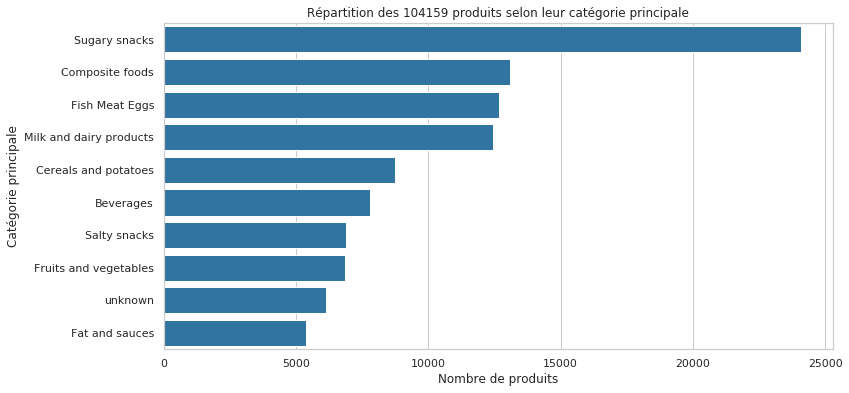

In [24]:
ordre_categorie = open_food_facts_df['pnns_groups_1'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_1'].count()
plt.rcParams["figure.figsize"] = (12, 6)
sns.countplot(y='pnns_groups_1', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie principale'.format(nombre_produits))
plt.ylabel('Catégorie principale')
plt.xlabel('Nombre de produits')

## *pnns_groups_2* : catégorie secondaire des produits

In [137]:
open_food_facts_df['pnns_groups_2'].value_counts()

Biscuits and cakes                  11070
One-dish meals                      10693
Sweets                               8043
Processed meat                       6718
unknown                              6141
Dressings and sauces                 4356
Cheese                               4250
Milk and yogurt                      4144
Salty and fatty products             3621
Chocolate products                   3598
Cereals                              3502
Sweetened beverages                  3284
Meat                                 2775
Appetizers                           2700
Fish and seafood                     2647
Bread                                2322
Vegetables                           2291
Dairy desserts                       2215
Fruits                               2155
Ice cream                            1851
Breakfast cereals                    1512
Fruit juices                         1449
pastries                             1383
Pizza pies and quiche             

Text(0.5, 0, 'Nombre de produits')

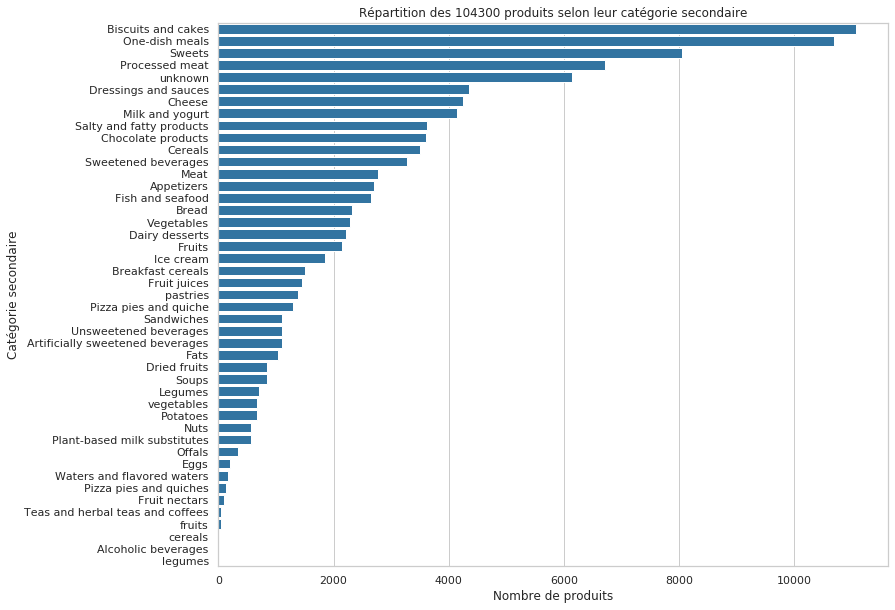

In [140]:
ordre_categorie = open_food_facts_df['pnns_groups_2'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_2'].count()
plt.rcParams["figure.figsize"] = (12, 10)
sns.countplot(y='pnns_groups_2', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie secondaire'.format(nombre_produits))
plt.ylabel('Catégorie secondaire')
plt.xlabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les principales sous-catégories représentées parmi les produits sont les biscuits, gâteaux, plats préparés, bonbons et la viande transformée.

Les catégories qui pourront être rassemblées en une seule sont :
- *Vegetables*, *vegetables*, *legumes* et *Legumes* 
- *Fruits* et *fruits*
- *Cereals* et *cereals*
- *Pizza pies and quiche* et *Pizza pies and quiches*

Regroupons ces sous-catégories.

In [27]:
open_food_facts_df['pnns_groups_2'].replace(
                        ['fruits', 'legumes', 'Legumes', 'vegetables', 'cereals', 'Pizza pies and quiches'],
                        ['Fruits', 'Vegetables', 'Vegetables', 'Vegetables', 'Cereals', 'Pizza pies and quiche'],
                        inplace=True)

In [28]:
open_food_facts_df['pnns_groups_2'].value_counts()

Biscuits and cakes                  11070
One-dish meals                      10693
Sweets                               8043
Processed meat                       6718
unknown                              6141
Dressings and sauces                 4356
Cheese                               4250
Milk and yogurt                      4144
Vegetables                           3679
Salty and fatty products             3621
Chocolate products                   3598
Cereals                              3505
Sweetened beverages                  3284
Meat                                 2775
Appetizers                           2700
Fish and seafood                     2647
Bread                                2322
Dairy desserts                       2215
Fruits                               2195
Ice cream                            1851
Breakfast cereals                    1512
Fruit juices                         1449
Pizza pies and quiche                1433
pastries                          

Text(0.5, 0, 'Nombre de produits')

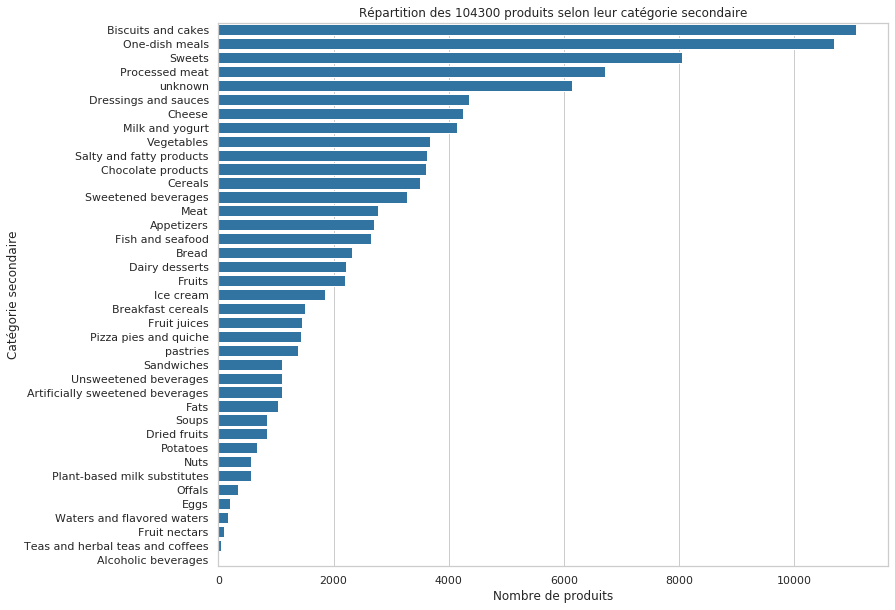

In [29]:
ordre_categorie = open_food_facts_df['pnns_groups_2'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_2'].count()
plt.rcParams["figure.figsize"] = (12, 10)
sns.countplot(y='pnns_groups_2', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie secondaire'.format(nombre_produits))
plt.ylabel('Catégorie secondaire')
plt.xlabel('Nombre de produits')

## *brands_tags* : marque des produits

In [33]:
open_food_facts_df['brands_tags'].value_counts().head(30)

u                            3576
auchan                       3107
carrefour                    2965
casino                       2035
leader-price                 1688
picard                       1325
cora                         1116
fleury-michon                 799
netto                         782
monoprix                      721
belle-france                  716
la-vie-claire                 669
franprix                      631
le-gaulois                    532
thiriet                       506
bio-village,marque-repere     446
u-saveurs,u                   397
u-bio,u                       383
nestle                        369
dia                           330
monique-ranou                 327
sans-marque                   322
bjorg                         321
casino-bio,casino             285
yoplait                       284
haribo                        278
andros                        276
paturages                     271
knorr                         264
bonduelle     

La plupart des marques représentées sont des chaînes de la grande distribution ou des entreprises de l'agro-alimentaire. La variable peut donner aussi une indication sur le lieu d'achat du produit.

## *labels_en* : label portés par les produits

In [34]:
open_food_facts_df['labels_en'].value_counts().head(30)

Green Dot                                                                       4116
Made in France                                                                  3010
Organic                                                                         2244
Organic,EU Organic,AB Agriculture Biologique                                    1700
No preservatives                                                                1037
No colorings,No preservatives                                                    823
PDO                                                                              763
Gluten-free                                                                      750
Green Dot,Made in France                                                         718
No colorings                                                                     525
Green Dot,fr:eco-emballages                                                      501
Palm-oil-free                                                    

In [35]:
open_food_facts_df['labels_en'].str.find("preservatives").describe()

count    71866.000000
mean         2.875059
std         15.074944
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        283.000000
Name: labels_en, dtype: float64

In [37]:
open_food_facts_df[open_food_facts_df['labels_en'].str.find("preservatives") > -1]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
10,heinz,"Vegetarian,No artificial colors,No flavors,No ...","en:e101,en:e101i",d,Fat and sauces,Dressings and sauces,1.0,14.0,4
18,heinz,"No preservatives,No thickening agent",NaN,d,Fat and sauces,Dressings and sauces,0.0,13.0,3
31,genius,"Gluten-free,No preservatives","en:e422,en:e464",b,Cereals and potatoes,Bread,2.0,0.0,4
99,liebig,"Cooked in France,No colorings,No preservatives",en:e14xx,c,Fruits and vegetables,Soups,1.0,3.0,4
201,koon-chun,No preservatives,en:e401,c,Fat and sauces,Dressings and sauces,1.0,6.0,4
...,...,...,...,...,...,...,...,...,...
104270,yeo-s,No preservatives,"en:e407,en:e452,en:e471,en:e500",b,Beverages,Plant-based milk substitutes,4.0,0.0,4
104275,pa-food,"Vegetarian,Halal,Vegan,No cholesterol,No prese...",NaN,b,Cereals and potatoes,Bread,0.0,2.0,3
104279,kawan,No preservatives,en:e500,c,Cereals and potatoes,Bread,1.0,10.0,3
104280,marigold,"FSC,No-preservativeshalal","en:e296,en:e330,en:e466",b,unknown,unknown,3.0,2.0,4


In [38]:
open_food_facts_df['labels_en'].str.find("additives").describe()

count    71866.000000
mean        -0.503326
std          5.985629
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        222.000000
Name: labels_en, dtype: float64

In [39]:
open_food_facts_df[open_food_facts_df['labels_en'].str.find("additives") > -1]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
125,thai-kitchen,No additives,NaN,d,Beverages,Plant-based milk substitutes,0.0,11.0,1
261,lily-of-the-desert,"Organic,No additives,No preservatives",en:e330,b,Beverages,Unsweetened beverages,1.0,1.0,NaN
669,old-dominion,"Gluten-free,No additives,No preservatives",NaN,c,Salty snacks,Nuts,0.0,3.0,3
877,thomas-brioche,"No colorings,No preservatives,No additives",NaN,d,Sugary snacks,pastries,0.0,17.0,4
978,carrefour,No additives,NaN,e,Sugary snacks,Biscuits and cakes,0.0,21.0,4
...,...,...,...,...,...,...,...,...,...
103258,vivera,"No additives,With Sunflower oil",NaN,a,unknown,unknown,0.0,-5.0,4
103336,body-fit,"Low or no salt,Organic,EU Organic,EU/non-EU Ag...",NaN,a,Sugary snacks,Sweets,0.0,-2.0,1
104222,meadow-fresh,"No additives,No preservatives",NaN,b,unknown,unknown,0.0,1.0,1
104225,mother-earth,No additives,NaN,d,Cereals and potatoes,Vegetables,0.0,14.0,4


Au vu de la grande diversité des labels présents sur les produits. Tous ne seront pas utiles pour l'analyse et l'application, il sera intéressant de travailler sur les labels de type "No additives" ou "No preservatives".

## *additives_tags* : liste d'additifs présents dans les produits

In [43]:
open_food_facts_df['additives_tags'].value_counts().head(30)

en:e322,en:e322i                      3834
en:e330                               2802
en:e440                               2540
en:e14xx                              1969
en:e300                               1870
en:e250,en:e301                       1248
en:e300,en:e330                        912
en:e250                                818
en:e407                                812
en:e250,en:e316                        748
en:e330,en:e440                        745
en:e415                                593
en:e252                                571
en:e412                                502
en:e202                                493
en:e471                                487
en:e412,en:e415                        458
en:e14xx,en:e415                       393
en:e160c                               357
en:e160b                               330
en:e500,en:e500ii                      323
en:e224,en:e330                        306
en:e270                                284
en:e250,en:

# Sélection des variables

In [ ]:
# Variables inutiles pour l'étude : de 'code' à 'image_nutrition_small_url'
# Variables avec aucune donnée : de 'cities' à 'water-hardness_100g'
# Variables avec 100 valeurs au max : de '-butyric-acid_100g' à 'carnitine_100g'
variablesEcartees = ["code", "url", "creator", "created_t", "created_datetime", "last_modified_t",
                     "last_modified_datetime", "quantity", "packaging", "packaging_tags", "packaging_text",
                     "first_packaging_code_geo", "allergens", "allergens_en", "traces", "traces_tags", 
                     "traces_en", "states", "states_tags", "states_en", "image_url", "image_small_url", 
                     "image_ingredients_url", "image_ingredients_small_url", "image_nutrition_url", 
                     "image_nutrition_small_url", "cities", "no_nutriments", "ingredients_from_palm_oil",
                     "ingredients_that_may_be_from_palm_oil", "-lignoceric-acid_100g", "nutrition-score-uk_100g",
                     "water-hardness_100g", "-butyric-acid_100g", "-caproic-acid_100g", "-caprylic-acid_100g",
                     "-capric-acid_100g", "-lauric-acid_100g", "-myristic-acid_100g", "-palmitic-acid_100g",
                     "-stearic-acid_100g", "-arachidic-acid_100g", "-behenic-acid_100g", "-cerotic-acid_100g",
                     "-montanic-acid_100g", "-melissic-acid_100g", "-arachidonic-acid_100g", "-gamma-linolenic-acid_100g",
                     "-dihomo-gamma-linolenic-acid_100g", "omega-9-fat_100g", "-oleic-acid_100g", "-elaidic-acid_100g",
                     "-gondoic-acid_100g", "-mead-acid_100g", "-erucic-acid_100g", "-nervonic-acid_100g", "-glucose_100g",
                     "-fructose_100g", "-lactose_100g", "-maltose_100g", "-maltodextrins_100g", "casein_100g", 
                     "serum-proteins_100g", "nucleotides_100g", "beta-carotene_100g", "chlorophyl_100g", "choline_100g", 
                     "beta-glucan_100g", "inositol_100g", "carnitine_100g"]


selectionColonnes = [colonne for colonne in open_food_facts_data.columns.values if colonne not in variablesEcartees]

In [ ]:
open_food_facts_data = open_food_facts_data[selectionColonnes]

In [ ]:
open_food_facts_data.head()

,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,18.0,d,NaN,Fat and sauces,Dressings and sauces,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtre des données France (produits vendus en France)

In [ ]:
open_food_facts_data = open_food_facts_data[open_food_facts_data['countries_en'] == 'France']

In [ ]:
open_food_facts_data.describe()

# Optimisation de l'usage de la mémoire

In [ ]:
open_food_facts_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Columns: 114 entries, product_name to phylloquinone_100g
dtypes: float64(76), object(38)
memory usage: 1.7 GB


Gain de *81%* de mémoire après la suppression des variables inutiles et (quasi) vides. Avant : *8.5 GB*, après : *1.6 GB*.

On peut remarquer que la variable *-eicosapentaenoic-acid_100g* est considérée comme *object* alors qu'elle est censée être un *float*.

In [ ]:
pd.set_option("display.max_rows", None)
open_food_facts_data.groupby('-eicosapentaenoic-acid_100g').size()

Elle ne contient que des nombres décimaux malgré son encodage. Je vais le modifier en float64.

In [ ]:
# Remise de l'option par défaut
pd.set_option("display.max_rows", 20)
open_food_facts_data['-eicosapentaenoic-acid_100g'] = open_food_facts_data['-eicosapentaenoic-acid_100g'].astype('float64')

In [ ]:
open_food_facts_data['-eicosapentaenoic-acid_100g'].dtypes

dtype('float64')

In [ ]:
open_food_facts_data.describe(include='all')

## Modification des formats de données

### Variables de type object

In [ ]:
# Attention : gourmand en RAM
open_food_facts_data.select_dtypes(include=['object']).describe() 

In [ ]:
# Modification des types de variables en 'category' pour les 'objects'
# si le nombre de modalités < 50% du nombre d'individus
def convertir_object_en_category(df_obj):

  converted_obj = pd.DataFrame()

  for col in df_obj.columns:
      if len(df_obj[col].unique()) / len(df_obj[col]) < 0.5:
          converted_obj.loc[:,col] = df_obj[col].astype('category')
      else:
          converted_obj.loc[:,col] = df_obj[col]

  return converted_obj


In [ ]:
converted_obj = convertir_object_en_category(open_food_facts_data.select_dtypes(include=['object']))

In [ ]:
converted_obj.dtypes

product_name                  object
abbreviated_product_name    category
generic_name                category
brands                      category
brands_tags                 category
                              ...   
pnns_groups_1               category
pnns_groups_2               category
brand_owner                 category
main_category               category
main_category_en            category
Length: 37, dtype: object

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)    
    
    # convertir les bytes en megabytes
    usage_mb = usage_b / 1024 ** 2 
    
    # afficher sous format nombre (min 3 chiffres) et une précision de deux décimales
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
print(mem_usage(open_food_facts_data.select_dtypes(include=['object'])))
print(mem_usage(converted_obj))

1273.39 MB
280.98 MB


### Variables de type float

In [ ]:
# Attention : gourmand en RAM
open_food_facts_data.select_dtypes(include=['float']).describe()

In [ ]:
open_food_facts_data.select_dtypes(include=['float']).info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Data columns (total 77 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   serving_quantity                         56687 non-null   float64
 1   additives_n                              201930 non-null  float64
 2   ingredients_from_palm_oil_n              201930 non-null  float64
 3   ingredients_that_may_be_from_palm_oil_n  201930 non-null  float64
 4   nutriscore_score                         228371 non-null  float64
 5   nova_group                               167562 non-null  float64
 6   energy-kj_100g                           56901 non-null   float64
 7   energy-kcal_100g                         520673 non-null  float64
 8   energy_100g                              546734 non-null  float64
 9   energy-from-fat_100g                     30 non-null      float64
 10  fat_100g                       

In [ ]:
# Conversion des float64 en float32
converted_float = open_food_facts_data.select_dtypes(include=['float']).apply(pd.to_numeric, downcast='float')
converted_float.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Data columns (total 77 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   serving_quantity                         56687 non-null   float32
 1   additives_n                              201930 non-null  float32
 2   ingredients_from_palm_oil_n              201930 non-null  float32
 3   ingredients_that_may_be_from_palm_oil_n  201930 non-null  float32
 4   nutriscore_score                         228371 non-null  float32
 5   nova_group                               167562 non-null  float32
 6   energy-kj_100g                           56901 non-null   float32
 7   energy-kcal_100g                         520673 non-null  float32
 8   energy_100g                              546734 non-null  float32
 9   energy-from-fat_100g                     30 non-null      float32
 10  fat_100g                       

### Regroupement des données optimisées dans un dataframe

In [ ]:
optimized_df = pd.DataFrame()

In [ ]:
optimized_df[converted_obj.columns] = converted_obj
optimized_df[converted_float.columns] = converted_float

In [ ]:
optimized_df

,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,main_category,main_category_en,serving_quantity,additives_n,ingredients_from_palm_oil_n,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,NaN,NaN,NaN,NaN,d,Fat and sauces,Dressings and sauces,NaN,en:mustards,Mustards,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,fr:xsf,fr:xsf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648399,Minis beignets,NaN,Beignets natures sucrés,NaN,NaN,"Snacks, Snacks sucrés, Beignets sucrés","en:snacks,en:sweet-snacks,en:sweet-fritters","Snacks,Sweet snacks,Sweet Fritters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown

In [ ]:
print(mem_usage(open_food_facts_data))
print(mem_usage(optimized_df))

1685.02 MB
486.80 MB


Avec le jeu de données contenant les variables utiles et non vides, on passe de *4.0 GB* à *1.2 GB* soit un gain de mémoire de *70%*. À noter qu'on obtient un gain de *85%* sur le jeu de données de départ.

### Construction du dictionnaire du type de données

In [ ]:
# À voir si je l'utilise
dtypes = optimized_df.dtypes
column_types = dict(zip(dtypes.index, [i.name for i in dtypes.values]))
print(column_types)

{'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'brands': 'category', 'brands_tags': 'category', 'categories': 'category', 'categories_tags': 'category', 'categories_en': 'category', 'origins': 'category', 'origins_tags': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'manufacturing_places_tags': 'category', 'labels': 'category', 'labels_tags': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'emb_codes_tags': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries': 'category', 'countries_tags': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'serving_size': 'category', 'additives': 'category', 'additives_tags': 'category', 'additives_en': 'category', 'ingredients_from_palm_oil_tags': 'category', 'ingredients_that_may_be_from_palm_oil_tags': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2':

## Export des données optimisées

### Vers un CSV

In [ ]:
path = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.csv'
optimized_df.to_csv(path, sep="\t")

### Vers un HDF5

In [ ]:
# À voir plus tard
path_hdf = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.h5'
optimized_df.to_hdf(path_hdf, key="optimized_df", format="table")

# Chargement des données optimisées

Les données optimisées contiennent uniquement des produits vendus en France. De plus, elles ne présentent que des colonnes qui peuvent être utiles à l'analyse et l'application. Celles-ci contiennent au minimum 100 valeurs avant la suppression des produits vendus à l'étranger.

In [3]:
path = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.csv'
data_types = {'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'brands': 'category', 
              'brands_tags': 'category', 'categories': 'category', 'categories_tags': 'category', 'categories_en': 'category', 
              'origins': 'category', 'origins_tags': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 
              'manufacturing_places_tags': 'category', 'labels': 'category', 'labels_tags': 'category', 'labels_en': 'category', 
              'emb_codes': 'category', 'emb_codes_tags': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 
              'stores': 'category', 'countries': 'category', 'countries_tags': 'category', 'countries_en': 'category', 
              'ingredients_text': 'category', 'serving_size': 'category', 'additives': 'category', 'additives_tags': 'category', 
              'additives_en': 'category', 'ingredients_from_palm_oil_tags': 'category', 
              'ingredients_that_may_be_from_palm_oil_tags': 'category', 'nutriscore_grade': 'category', 
              'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'brand_owner': 'category', 'main_category': 'category', 
              'main_category_en': 'category', 'cities': 'float32', 'serving_quantity': 'float32', 'no_nutriments': 'float32', 
              'additives_n': 'float32', 'ingredients_from_palm_oil_n': 'float32', 'ingredients_from_palm_oil': 'float32', 
              'ingredients_that_may_be_from_palm_oil_n': 'float32', 'ingredients_that_may_be_from_palm_oil': 'float32', 
              'nutriscore_score': 'float32', 'nova_group': 'float32', 'energy-kj_100g': 'float32', 'energy-kcal_100g': 'float32', 
              'energy_100g': 'float32', 'energy-from-fat_100g': 'float32', 'fat_100g': 'float32', 'saturated-fat_100g': 'float32', 
              '-butyric-acid_100g': 'float32', '-caproic-acid_100g': 'float32', '-caprylic-acid_100g': 'float32', 
              '-capric-acid_100g': 'float32', '-lauric-acid_100g': 'float32', '-myristic-acid_100g': 'float32', 
              '-palmitic-acid_100g': 'float32', '-stearic-acid_100g': 'float32', '-arachidic-acid_100g': 'float32', 
              '-behenic-acid_100g': 'float32', '-lignoceric-acid_100g': 'float32', '-cerotic-acid_100g': 'float32', 
              '-montanic-acid_100g': 'float32', '-melissic-acid_100g': 'float32', 'monounsaturated-fat_100g': 'float32', 
              'polyunsaturated-fat_100g': 'float32', 'omega-3-fat_100g': 'float32', '-alpha-linolenic-acid_100g': 'float32', 
              '-eicosapentaenoic-acid_100g': 'float32', '-docosahexaenoic-acid_100g': 'float32', 'omega-6-fat_100g': 'float32', 
              '-linoleic-acid_100g': 'float32', '-arachidonic-acid_100g': 'float32', '-gamma-linolenic-acid_100g': 'float32', 
              '-dihomo-gamma-linolenic-acid_100g': 'float32', 'omega-9-fat_100g': 'float32', '-oleic-acid_100g': 'float32', 
              '-elaidic-acid_100g': 'float32', '-gondoic-acid_100g': 'float32', '-mead-acid_100g': 'float32', 
              '-erucic-acid_100g': 'float32', '-nervonic-acid_100g': 'float32', 'trans-fat_100g': 'float32', 
              'cholesterol_100g': 'float32', 'carbohydrates_100g': 'float32', 'sugars_100g': 'float32', '-sucrose_100g': 'float32', 
              '-glucose_100g': 'float32', '-fructose_100g': 'float32', '-lactose_100g': 'float32', '-maltose_100g': 'float32', 
              '-maltodextrins_100g': 'float32', 'starch_100g': 'float32', 'polyols_100g': 'float32', 'fiber_100g': 'float32', 
              '-soluble-fiber_100g': 'float32', '-insoluble-fiber_100g': 'float32', 'proteins_100g': 'float32', 
              'casein_100g': 'float32', 'serum-proteins_100g': 'float32', 'nucleotides_100g': 'float32', 'salt_100g': 'float32',
              'sodium_100g': 'float32', 'alcohol_100g': 'float32', 'vitamin-a_100g': 'float32', 'beta-carotene_100g': 'float32', 
              'vitamin-d_100g': 'float32', 'vitamin-e_100g': 'float32', 'vitamin-k_100g': 'float32', 'vitamin-c_100g': 'float32', 
              'vitamin-b1_100g': 'float32', 'vitamin-b2_100g': 'float32', 'vitamin-pp_100g': 'float32', 
              'vitamin-b6_100g': 'float32', 'vitamin-b9_100g': 'float32', 'folates_100g': 'float32', 'vitamin-b12_100g': 'float32', 
              'biotin_100g': 'float32', 'pantothenic-acid_100g': 'float32', 'silica_100g': 'float32', 'bicarbonate_100g': 'float32', 
              'potassium_100g': 'float32', 'chloride_100g': 'float32', 'calcium_100g': 'float32', 'phosphorus_100g': 'float32', 
              'iron_100g': 'float32', 'magnesium_100g': 'float32', 'zinc_100g': 'float32', 'copper_100g': 'float32', 
              'manganese_100g': 'float32', 'fluoride_100g': 'float32', 'selenium_100g': 'float32', 'chromium_100g': 'float32',
              'molybdenum_100g': 'float32', 'iodine_100g': 'float32', 'caffeine_100g': 'float32', 'taurine_100g': 'float32', 
              'ph_100g': 'float32', 'fruits-vegetables-nuts_100g': 'float32', 'fruits-vegetables-nuts-dried_100g': 'float32', 
              'fruits-vegetables-nuts-estimate_100g': 'float32', 'collagen-meat-protein-ratio_100g': 'float32', 
              'cocoa_100g': 'float32', 'chlorophyl_100g': 'float32', 'carbon-footprint_100g': 'float32', 
              'carbon-footprint-from-meat-or-fish_100g': 'float32', 'nutrition-score-fr_100g': 'float32', 
              'nutrition-score-uk_100g': 'float32', 'glycemic-index_100g': 'float32', 'water-hardness_100g': 'float32', 
              'choline_100g': 'float32', 'phylloquinone_100g': 'float32', 'beta-glucan_100g': 'float32', 
              'inositol_100g': 'float32', 'carnitine_100g': 'float32'}
open_food_facts_optimized_data = pd.read_csv(path, dtype=data_types, sep="\t")

In [4]:
open_food_facts_optimized_data

,Unnamed: 0,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,main_category,main_category_en,serving_quantity,additives_n,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,NaN,NaN,NaN,NaN,d,Fat and sauces,Dressings and sauces,NaN,en:mustards,Mustards,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
3,4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,fr:xsf,fr:xsf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700685,1648399,Minis beignets,NaN,Beignets natures sucrés,NaN,NaN,"Snacks, Snacks sucrés, Beignets sucrés","en:snacks,en:sweet-snacks,en:sweet-fritters","Snacks,Sweet snacks,Sweet Fritters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,NaN,en:swee

In [5]:
numero_derniere_colonne = len(open_food_facts_optimized_data.columns)
open_food_facts_optimized_data = open_food_facts_optimized_data.iloc[:, 1:numero_derniere_colonne]

In [6]:
open_food_facts_optimized_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Columns: 114 entries, product_name to phylloquinone_100g
dtypes: category(36), float32(77), object(1)
memory usage: 537.6 MB


# Sélection des variables pertinentes

## Suppression des variables avec au moins 80% de données manquantes

In [7]:
def compter_donnees_manquantes(dataset):
  return pd.DataFrame({'nombre': dataset.isnull().sum()})

In [8]:
def trier_nombre_donnees_manquantes(tableau):
  return tableau.sort_values(by=['nombre'], ascending=False)

In [9]:
def visualiser_donnees_manquantes(tableau_trie, volumetrie, seuil=0.8):
  plt.rcParams["figure.figsize"] = (12, 30)
  plt.barh(tableau_trie.index, tableau_trie.nombre)
  plt.xlabel('Nombre de données manquantes')
  plt.ylabel('Variables')
  plt.title('Nombre de données manquantes parmi le dataset')
  plt.vlines(seuil*volumetrie, ymin=-1, ymax=113, colors='r') # valeurs de ymin et ymax à automatiser

In [ ]:
# pas forcément utile car besoin d'utiliser le tableau 'nb_donnees_manquantes_df'
# par la suite pour voir les valeurs et supprimer les variables qui dépassent le seuil
### à supprimer ? ###
def etudier_nombre_donnees_manquantes(dataset):
  nb_donnees_manquantes_df = compter_donnees_manquantes(dataset)
  nb_donnees_manquantes_df = trier_nombre_donnees_manquantes(nb_donnees_manquantes_df)
  nb_donnees_manquantes_df.head(20)
  visualiser_donnees_manquantes(nb_donnees_manquantes_df, len(dataset))

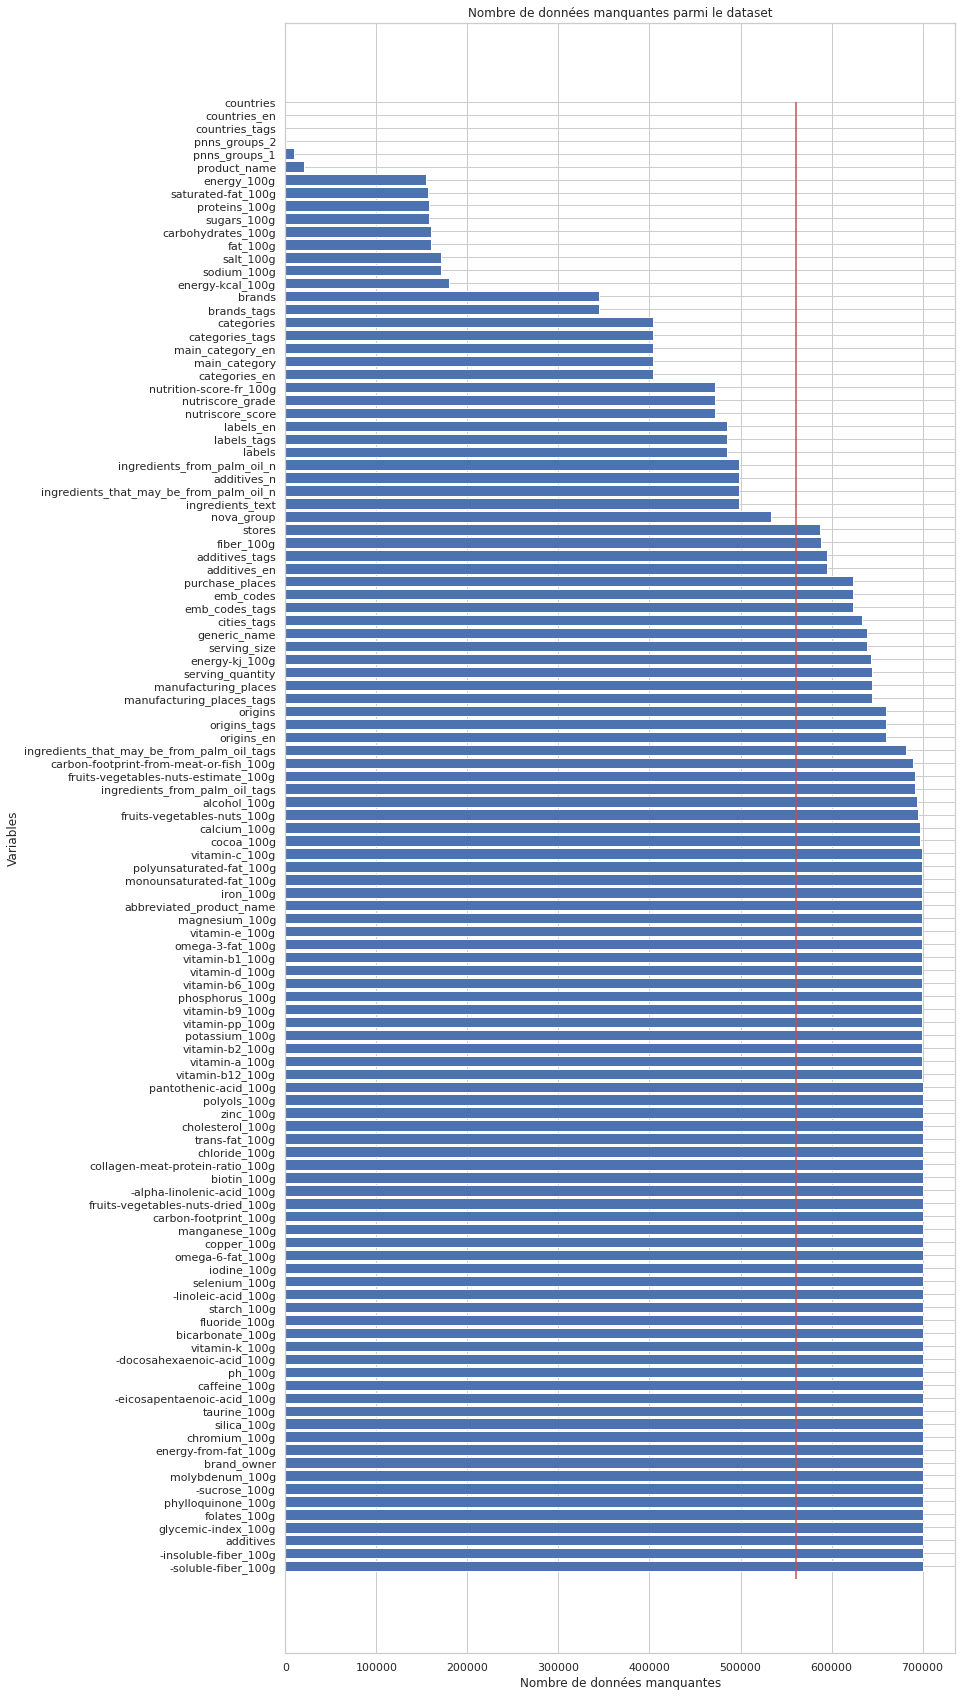

In [10]:
nb_donnees_manquantes_df = compter_donnees_manquantes(open_food_facts_optimized_data)
nb_donnees_manquantes_df = trier_nombre_donnees_manquantes(nb_donnees_manquantes_df)
visualiser_donnees_manquantes(nb_donnees_manquantes_df, len(open_food_facts_optimized_data))

Les variables contenant au moins 80% de données manquantes seront supprimées exceptées les suivantes :
* 'stores'
* 'fiber_100g'
* 'additives_tags' 
* 'additives_en'
* 'manufacturing_places'
* 'manufacturing_places_tags'
* 'origins'
* 'origins_tags'
* 'origins_en'

En effet, ces variables présentent un intérêt dans le cadre de mon application autour des additifs.



### Identification des variables à supprimer

In [ ]:
nb_donnees_manquantes_df

,nombre
-soluble-fiber_100g,700690
-insoluble-fiber_100g,700690
additives,700688
glycemic-index_100g,700687
folates_100g,700687
...,...
pnns_groups_1,9695
pnns_groups_2,105
countries_tags,0
countries_en,0


In [11]:
nb_donnees_manquantes_df['seuil'] = 0.8*700690

In [12]:
variables_exceptions = ['stores',
                        'fiber_100g',
                        'additives_tags',
                        'additives_en',
                        'manufacturing_places',
                        'manufacturing_places_tags',
                        'origins',
                        'origins_tags',
                        'origins_en']

In [13]:
nb_donnees_manquantes_df = nb_donnees_manquantes_df.assign(flg_depasse_seuil=lambda df: df.nombre > df.seuil,
                                                           flg_est_exception=False)

In [14]:
nb_donnees_manquantes_df.loc[variables_exceptions, 'flg_est_exception'] = True

In [15]:
nb_donnees_manquantes_df = nb_donnees_manquantes_df.assign(flg_est_ecartee=lambda df: df.flg_depasse_seuil & ~df.flg_est_exception)

In [16]:
nb_donnees_manquantes_df.loc[variables_exceptions]

,nombre,seuil,flg_depasse_seuil,flg_est_exception,flg_est_ecartee
stores,587572,560552.0,True,True,False
fiber_100g,588032,560552.0,True,True,False
additives_tags,595118,560552.0,True,True,False
additives_en,595118,560552.0,True,True,False
manufacturing_places,644274,560552.0,True,True,False
manufacturing_places_tags,644308,560552.0,True,True,False
origins,659693,560552.0,True,True,False
origins_tags,659747,560552.0,True,True,False
origins_en,659747,560552.0,True,True,False


In [ ]:
nb_donnees_manquantes_df

,nombre,seuil,flg_depasse_seuil,flg_est_exception,flg_est_ecartee
-soluble-fiber_100g,700690,560552.0,True,False,True
-insoluble-fiber_100g,700690,560552.0,True,False,True
additives,700688,560552.0,True,False,True
glycemic-index_100g,700687,560552.0,True,False,True
folates_100g,700687,560552.0,True,False,True
...,...,...,...,...,...
pnns_groups_1,9695,560552.0,False,False,False
pnns_groups_2,105,560552.0,False,False,False
countries_tags,0,560552.0,False,False,False
countries_en,0,560552.0,False,False,False


In [17]:
variables_ecartees = nb_donnees_manquantes_df[nb_donnees_manquantes_df['flg_est_ecartee']].index.values # tolist() si besoin

### Suppression des variables identifées

In [18]:
variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [19]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [ ]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   product_name                             680448 non-null  object  
 1   brands                                   355862 non-null  category
 2   brands_tags                              355831 non-null  category
 3   categories                               296954 non-null  category
 4   categories_tags                          296954 non-null  category
 5   categories_en                            296954 non-null  category
 6   origins                                  40997 non-null   category
 7   origins_tags                             40943 non-null   category
 8   origins_en                               40943 non-null   category
 9   manufacturing_places                     56416 non-null   category
 10  manufacturing_places

Après la suppression des variables contenant au moins 80% de données manquantes, hormis les exceptions. Je me retrouve avec des variables s'apparentant à des doublons telles que :
* 'brands' et 'brands_tags' (1)
* 'categories', 'categories_tags' et 'categories_en' (2)
* 'origins', 'origins_tags' et 'origins_en' (3)
* 'manufacturing_places' et 'manufacturing_places_tags' (4)
* 'labels', 'labels_tags' et 'labels_en' (5)
* 'countries', 'countries_tags' et 'countries_en' (6)
* 'additives_tags' et 'additives_en' (7)
* 'pnns_groups_1' et 'pnns_groups_2' (8)
* 'main_category' et 'main_category_en' (9)
* 'nutriscore_score' et 'nutrition-score-fr_100g' (10)

Parmi ces groupes de variables, on peut identifier certains représentant possiblement les mêmes données comme les groupes :
* (2), (5), (8) et (9).

La prochaine partie traitera ces problèmes de doublons.


## Suppression des variables dites doublons

### Variables "catégories de produits"

In [20]:
variables_categories = ['categories', 'categories_tags', 'categories_en',
                        'labels', 'labels_tags', 'labels_en',
                       'pnns_groups_1', 'pnns_groups_2',
                       'main_category', 'main_category_en']

# affichage d'un échantillon de 30 lignes présentant les variables ci-dessus remplies
open_food_facts_optimized_data.loc[open_food_facts_optimized_data['categories'].notnull() &
                                open_food_facts_optimized_data['categories_tags'].notnull() &
                                open_food_facts_optimized_data['categories_en'].notnull() &
                                open_food_facts_optimized_data['labels'].notnull() &
                                open_food_facts_optimized_data['labels_tags'].notnull() &
                                open_food_facts_optimized_data['labels_en'].notnull() &
                                open_food_facts_optimized_data['pnns_groups_1'].notnull() &
                                open_food_facts_optimized_data['pnns_groups_2'].notnull() &
                                open_food_facts_optimized_data['main_category'].notnull() &
                                open_food_facts_optimized_data['main_category_en'].notnull(), variables_categories].sample(30)

,categories,categories_tags,categories_en,labels,labels_tags,labels_en,pnns_groups_1,pnns_groups_2,main_category,main_category_en
368922,"Crêpes et galettes, Crêpes, Crêpes de froment","en:crepes-and-galettes,en:crepes,fr:crepes-de-...","Crêpes and galettes,Crêpes,fr:Crêpes de froment","Bio,Bio européen,FR-BIO-01,Ab-agriculture-biol...","en:organic,en:eu-organic,en:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique,F...",unknown,unknown,fr:crepes-de-froment,fr:Crêpes de froment
477614,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Bio,Sans gluten,Agriculture UE/Non UE,Fabriqué...","en:organic,en:gluten-free,en:eu-non-eu-agricul...","Organic,Gluten-free,EU/non-EU Agriculture,Made...",Cereals and potatoes,Bread,en:crispbreads,Crispbreads
323646,Boissons,en:beverages,Beverages,Bio,en:organic,Organic,Beverages,Unsweetened beverages,en:beverages,Beverages
182134,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Palm oil free, en:made-in-france","en:made-in-france,en:palm-oil-free","Made in France,Palm-oil-free",Sugary snacks,Biscuits and cakes,en:chocolate-biscuits,Chocolate biscuits
244453,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Pastrie...",Produits retirés du marché lors du scandale du...,fr:produits-retires-du-marche-lors-du-scandale...,fr:produits-retires-du-marche-lors-du-scandale...,Sugary snacks,Biscuits and cakes,en:waffles,Waffles
468717,"Boissons, Sirops, Sirops aromatisés, Sirops de...","en:beverages,en:syrups,en:flavoured-syrups,en:...","Beverages,Syrups,Flavoured syrups,Strawberry s...",en:no-colorings,en:no-colorings,No colorings,Beverages,Sweetened beverages,en:strawberry-syrups,Strawberry syrups
179559,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Organic, fr:ab-agriculture-biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",unknown,unknown,en:chives,Chives
565467,"Produits laitiers, Desserts, Produits fermenté...","en:dairies,en:desserts,en:fermented-foods,en:f...","Dairies,Desserts,Fermented foods,Fermented mil...","Point Vert, Eco-Emballages, Sans morceaux","en:green-dot,fr:eco-emballages,fr:sans-morceaux","Green Dot,fr:eco-emballages,fr:sans-morceaux",Milk and dairy products,Milk and yogurt,fr:yaourts-aux-fruits-sans-morceaux,fr:yaourts-aux-fruits-sans-morceaux
295791,"Produits à tartiner, Produits à tartiner salés","en:spreads,en:salted-spreads","Spreads,Salted spreads","Bio,Bio européen,AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",Salty snacks,Salty and fatty products,en:salted-spreads,Salted spreads
437830,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","PDO , Organic","en:organic,en:pdo","Organic,PDO",Fat and sauces,Fats,en:extra-virgin-olive-oils,Extra-virgin olive oils


Au vu de cet échantillon, la majeure partie de ces variables représente bien des catégories de produits. Parmi ces 9 variables, 'pnns_groups_1' et 'pnns_groups_2' seront conservées. En effet, ces deux variables contiennent des catégories qui vont faciliter les analyses. De plus, elles sont bien mieux renseignées. Les autres sont trop détaillées : soit elles contiennent des noms de catégories à rallonge ou plusieurs noms (ex : surgelés, plats préparés, pizzas tartes salées, etc.) ou elles des catégories trop précises (ex : brioche tressée). Les variables 'label_xxx' représentent en réalité les labels que le produit porte. Celle qui est plus facilement exploitable est 'label_en', elle sera donc conservée.


In [21]:
variables_ecartees = ['categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 
                      'main_category', 'main_category_en']

### Autres variables

In [ ]:
variables_autres = ['brands', 'brands_tags',
                    'origins', 'origins_tags', 'origins_en',
                    'manufacturing_places', 'manufacturing_places_tags',
                    'countries', 'countries_tags', 'countries_en',
                    'additives_tags', 'additives_en',
                    'nutriscore_score', 'nutrition-score-fr_100g']

# affichage d'un échantillon de 30 lignes présentant les variables ci-dessus remplies
open_food_facts_optimized_data.loc[open_food_facts_optimized_data['brands'].notnull() &
                              open_food_facts_optimized_data['brands_tags'].notnull() &
                              open_food_facts_optimized_data['origins'].notnull() &
                              open_food_facts_optimized_data['origins_tags'].notnull() &
                              open_food_facts_optimized_data['origins_en'].notnull() &
                              open_food_facts_optimized_data['manufacturing_places'].notnull() &
                              open_food_facts_optimized_data['manufacturing_places_tags'].notnull() &
                              open_food_facts_optimized_data['countries'].notnull() &
                              open_food_facts_optimized_data['countries_tags'].notnull() &
                              open_food_facts_optimized_data['countries_en'].notnull() &
                              open_food_facts_optimized_data['additives_tags'].notnull() &
                              open_food_facts_optimized_data['additives_en'].notnull() &
                              open_food_facts_optimized_data['nutriscore_score'].notnull() &
                              open_food_facts_optimized_data['nutrition-score-fr_100g'].notnull(), variables_autres].sample(30)

,brands,brands_tags,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,countries,countries_tags,countries_en,additives_tags,additives_en,nutriscore_score,nutrition-score-fr_100g
593448,Zena,zena,Afrique de l'ouest,fr:afrique-de-l-ouest,fr:afrique-de-l-ouest,Sénégal,senegal,France,en:france,France,"en:e330,en:e440","E330 - Citric acid,E440 - Pectins",12.0,12.0
259835,Carrefour,carrefour,France,en:france,France,France,france,France,en:france,France,"en:e250,en:e316,en:e392","E250 - Sodium nitrite,E316 - Sodium erythorbat...",12.0,12.0
425935,Brocéliande,broceliande,Porc Francais,fr:porc-francais,fr:porc-francais,Villers Bocage,villers-bocage,France,en:france,France,en:e316,E316 - Sodium erythorbate,5.0,5.0
201850,Tien Shan,tien-shan,Thaïlande ?,en:thailand,Thailand,Thaïlande,thailande,France,en:france,France,"en:e150a,en:e452,en:e466,en:e471,en:e500,en:e5...","E150a - Plain caramel,E452 - Polyphosphates,E4...",4.0,4.0
565589,Marks & Spencer,marks-spencer,Royaume-Uni,en:united-kingdom,United Kingdom,Royaume-Uni,royaume-uni,France,en:france,France,"en:e250,en:e300,en:e301,en:e471,en:e472e","E250 - Sodium nitrite,E300 - Ascorbic acid,E30...",12.0,12.0
349442,Auvernou,auvernou,France,en:france,France,France,france,France,en:france,France,"en:e250,en:e252,en:e330,en:e422,en:e460","E250 - Sodium nitrite,E252 - Potassium nitrate...",26.0,26.0
391336,Nos Régions ont du Talent,nos-regions-ont-du-talent,"Massif Central,France","en:france,fr:massif-central","France,fr:massif-central",France,france,France,en:france,France,en:e440,E440 - Pectins,8.0,8.0
185243,RichesMonts,richesmonts,France,en:france,France,France,france,France,en:france,France,en:e235,E235 - Natamycin,16.0,16.0
244610,Franprix,franprix,Suisse,en:switzerland,Switzerland,Suisse,suisse,France,en:france,France,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",24.0,24.0
303922,"Monoprix Gourmet,Monoprix","monoprix-gourmet,monoprix",Espagne,en:spain,Spain,Espagne,espagne,France,en:france,France,"en:e120,en:e250,en:e252","E120 - Cochineal,E250 - Sodium nitrite,E252 - ...",26.0,26.0


Les variables à l'intérieur de chaque groupe pris un à un, ont un nombre très proche de valeurs renseignées. Aucune variable ne sera donc privilégiée grâce à un nombre de valeurs renseignées plus important.

Les données étant filtrées sur les produits vendus uniquement en France, les variables 'countries_xxx' seront supprimées.

Quant aux autres variables, seront conservées :
* 'manufacturing_places_tags' car normalisation
* 'brands_tags' car normalisation
* 'origins' car le tag contient 'en' ou 'fr'
* 'additives_tags' car pas besoin de la description des additifs

Je vais ensuite vérifier que les deux variables sur le nutriscore sont les mêmes avant d'en rejeter une.



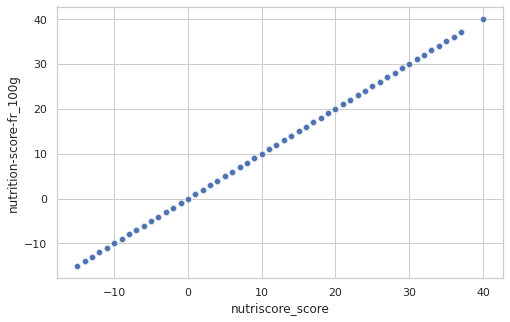

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
sns.scatterplot(data=open_food_facts_optimized_data, x='nutriscore_score', y='nutrition-score-fr_100g')

In [ ]:
# construction d'un dataframe avec les nutriscores pour étudier leur différence et les NaN
nutriscore = open_food_facts_optimized_data['nutriscore_score']
nutriscore_fr = open_food_facts_optimized_data['nutrition-score-fr_100g']
diff = nutriscore-nutriscore_fr
diff_nutriscore = pd.DataFrame({'nutriscore_score': nutriscore, 'nutrition-score-fr_100g': nutriscore_fr, 'diff': diff})
diff_nutriscore['diff'].describe()

count    228371.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: diff, dtype: float64

In [ ]:
diff_nan = diff_nutriscore[diff_nutriscore['diff'].isna()]
diff_nan.describe()

,nutriscore_score,nutrition-score-fr_100g,diff
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


Les deux variables sont identiques, je fais le choix de garder 'nutriscore_score'.

Je supprime donc les variables qui ont été écartées.

In [22]:
variables_doublons_ecartees = ['brands', 'origins_tags', 'origins_en', 'manufacturing_places',
                               'countries', 'countries_tags', 'countries_en', 'additives_en', 'nutrition-score-fr_100g']

variables_ecartees = variables_ecartees + variables_doublons_ecartees

variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [23]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [ ]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   product_name                             680448 non-null  object  
 1   brands_tags                              355831 non-null  category
 2   origins                                  40997 non-null   category
 3   manufacturing_places_tags                56382 non-null   category
 4   labels_en                                215476 non-null  category
 5   stores                                   113118 non-null  category
 6   ingredients_text                         201929 non-null  category
 7   additives_tags                           105572 non-null  category
 8   nutriscore_grade                         228371 non-null  category
 9   pnns_groups_1                            690995 non-null  category
 10  pnns_groups_2       

In [ ]:
open_food_facts_optimized_data.sample(30)

,product_name,brands_tags,origins,manufacturing_places_tags,labels_en,stores,ingredients_text,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
27560,Comte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,410.0,1715.0,34.000000,22.000000,0.000000,0.000000,NaN,26.00,0.80000,0.320000
168109,Miel bio de fleurs,famille-michaud,NaN,"famille-michaud-apiculteurs,domaine-saint-geor...","Organic,EU Organic,FR-BIO-01,AB Agriculture Bi...",Auchan,Miel,NaN,NaN,Sugary snacks,Sweets,0.0,0.0,0.0,NaN,2.0,304.0,1272.0,NaN,NaN,NaN,82.120003,0.20,0.30,0.01016,0.004064
249516,Mayonnaise,lesieur,NaN,NaN,NaN,NaN,"Huiles végétales (colza, tournesol), eau, vina...","en:e161b,en:e330,en:e385,en:e415",d,Fat and sauces,Dressings and sauces,4.0,0.0,1.0,18.0,4.0,660.0,2761.0,71.599998,5.600000,3.100000,2.000000,NaN,1.20,1.30000,0.520000
190496,Les vins du littoral,castelmaure-corbieres-2016,France,NaN,fr:Déconseillé aux femmes enceintes,Magasins U,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,85.0,356.0,0.002000,0.000200,0.500000,0.500000,0.01,0.02,0.00100,0.000400
115579,Gouda au cumin,ets-schoepfer-cs-20756-84035-avignon,NaN,NaN,NaN,NaN,"lait de vache, sel, ferments LACTIQUES, présur...",en:e251,d,Milk and dairy products,Cheese,1.0,0.0,0.0,16.0,3.0,376.0,1573.0,31.000000,21.000000,0.000000,0.000000,NaN,24.00,1.70000,0.680000
155538,Taillefine aux fruits,danone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408446,Goyave fruit du dragon,auchan,NaN,NaN,NaN,Auchan,NaN,NaN,e,Beverages,Sweetened beverages,NaN,NaN,NaN,13.0,NaN,42.0,176.0,0.500000,0.100000,9.800000,9.800000,NaN,0.50,0.01000,0.004000
654371,Torró crema torrada,alemany,NaN,NaN,NaN,NaN,NaN,NaN,d,Sugary snacks,Sweets,NaN,NaN,NaN,14.0,NaN,490.0,2050.0,28.000000,3.700000,47.000000,46.000000,6.10,10.00,0.05000,0.020000
411163,Torsade chocolat,casino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302035,Saint-Emilion Vieux Verdot,vieux-verdot,Bordelais,"saint-emilion,gironde",NaN,Gamm vert,Raisins noirs,NaN,NaN,NaN,Alcoholic beverages,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Suppression des variables impertinentes

In [24]:
variables_ecartees = ['origins', 'manufacturing_places_tags', 'stores', 'ingredients_text', 'ingredients_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil_n', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 
                      'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
                      'salt_100g', 'sodium_100g', 'product_name']

variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [25]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [26]:
open_food_facts_optimized_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       355831 non-null  category
 1   labels_en         215476 non-null  category
 2   additives_tags    105572 non-null  category
 3   nutriscore_grade  228371 non-null  category
 4   pnns_groups_1     690995 non-null  category
 5   pnns_groups_2     700585 non-null  category
 6   additives_n       201930 non-null  float32 
 7   nutriscore_score  228371 non-null  float32 
 8   nova_group        167562 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 30.0 MB


# Gestion des lignes avec données manquantes

In [27]:
open_food_facts_optimized_data.describe(include='all')

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
count,355831,215476,105572,228371,690995,700585,201930.000000,228371.000000,167562.000000
unique,47934,31403,27491,5,14,46,NaN,NaN,NaN
top,auchan,Organic,"en:e322,en:e322i",d,unknown,unknown,NaN,NaN,NaN
freq,9477,23259,5458,71767,437038,437038,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.583301,9.494069,3.413787
std,NaN,NaN,NaN,NaN,NaN,NaN,2.355338,8.748424,0.964747
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-15.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,10.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,16.000000,4.000000


Les variables sur les additifs sont les plus importantes, je vais donc chercher s'il y a des lignes avec une liste d'additifs mais sans nombre renseigné.

## Listes d'additifs renseignés

In [28]:
open_food_facts_optimized_data[open_food_facts_optimized_data['additives_tags'].notnull()]['additives_n'].describe()

count    105572.000000
mean          3.028417
std           2.499139
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          30.000000
Name: additives_n, dtype: float64

Toutes les listes d'additifs correspondent bien à un nombre d'additifs renseigné et le nombre d'additifs correspondant est bien supérieur à 0.

Les données sont donc cohérentes.

Supprimons les produits sans nombre d'additifs renseigné.

In [29]:
open_food_facts_optimized_data = open_food_facts_optimized_data[open_food_facts_optimized_data['additives_n'].notnull()]

In [30]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201930 entries, 2 to 700657
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       196263 non-null  category
 1   labels_en         108314 non-null  category
 2   additives_tags    105572 non-null  category
 3   nutriscore_grade  133192 non-null  category
 4   pnns_groups_1     197408 non-null  category
 5   pnns_groups_2     201930 non-null  category
 6   additives_n       201930 non-null  float32 
 7   nutriscore_score  133192 non-null  float32 
 8   nova_group        167125 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 10.5 MB


## Lignes peu remplies

Je commence par calculer le nombre de valeurs remplies et le taux de remplissage pour chaque produit.

In [31]:
open_food_facts_optimized_data = open_food_facts_optimized_data.assign(
                                              nb_valeurs_remplies=lambda df: df.count(axis=1),
                                              # on retire 1 aux valeurs car la colonne ajoutée ci-dessus est comptée
                                              taux_remplissage=lambda df: round((df.count(axis=1)-1)/(len(df.columns)-1)*100))

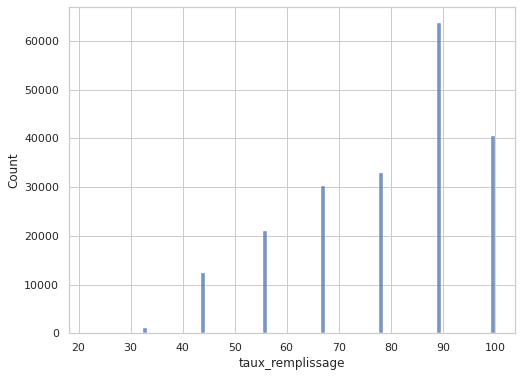

In [37]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.histplot(data=open_food_facts_optimized_data, x='taux_remplissage')

In [38]:
filtered_data = open_food_facts_optimized_data[open_food_facts_optimized_data['taux_remplissage'] > 80]

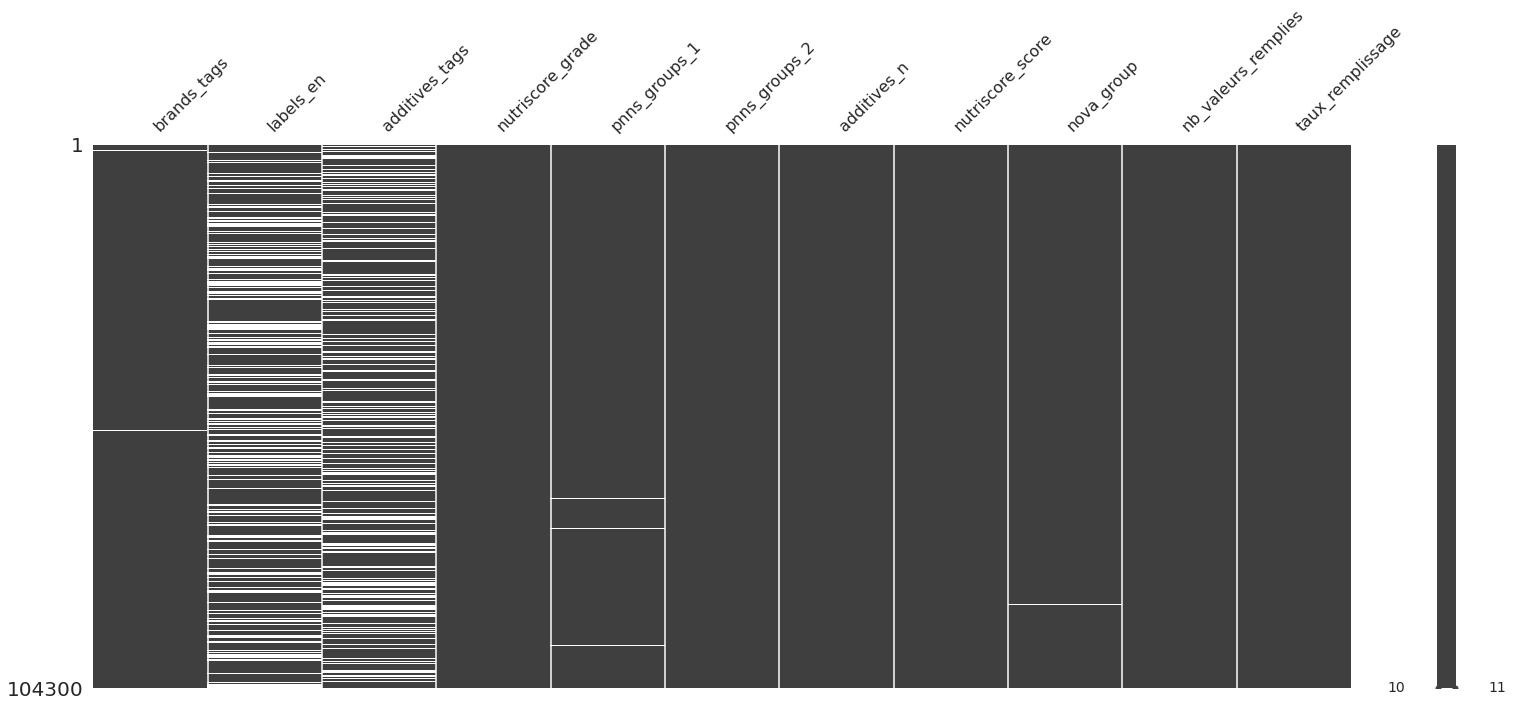

In [39]:
import missingno as msno
%matplotlib inline
msno.matrix(filtered_data)

In [40]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104300 entries, 64 to 700623
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   brands_tags          103844 non-null  category
 1   labels_en            71866 non-null   category
 2   additives_tags       73811 non-null   category
 3   nutriscore_grade     104300 non-null  category
 4   pnns_groups_1        104159 non-null  category
 5   pnns_groups_2        104300 non-null  category
 6   additives_n          104300 non-null  float32 
 7   nutriscore_score     104300 non-null  float32 
 8   nova_group           104067 non-null  float32 
 9   nb_valeurs_remplies  104300 non-null  int64   
 10  taux_remplissage     104300 non-null  float64 
dtypes: category(6), float32(3), float64(1), int64(1)
memory usage: 9.2 MB


Les produits ayant au moins 8 variables remplies seront conservés. En effet, cette décision permet de retenir plus de 100K produits. Ce qui est une bonne volumétrie pour réaliser des analyses. 

De plus, seules 2 variables sont un peu moins remplies que les autres à hauteur de 70K de valeurs non manquantes. Malgré que cela concerne la variable 'additives_tags', c'est un nombre acceptable. Les données manquantes de cette variable peuvent certainement signifier qu'il n'y a pas d'additif dans le produit. Cela sera étudié par la suite.

Je supprime donc les lignes avec moins de 8 variables remplies.

In [41]:
open_food_facts_optimized_data = filtered_data.drop(columns=['nb_valeurs_remplies', 'taux_remplissage'])

In [42]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104300 entries, 64 to 700623
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       103844 non-null  category
 1   labels_en         71866 non-null   category
 2   additives_tags    73811 non-null   category
 3   nutriscore_grade  104300 non-null  category
 4   pnns_groups_1     104159 non-null  category
 5   pnns_groups_2     104300 non-null  category
 6   additives_n       104300 non-null  float32 
 7   nutriscore_score  104300 non-null  float32 
 8   nova_group        104067 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 7.7 MB


J'obtiens mon jeu de données filtré et prêt à être analysé. Il sera exporté pour les analyses.

# Export du dataset filtré

In [44]:
path = '/content/drive/MyDrive/Data/openfoodfacts_data_for_analysis.csv'
open_food_facts_optimized_data.to_csv(path, sep="\t")